<a href="https://colab.research.google.com/gist/amandaahelena/27c8cae2cf35da3411c701f04bc4f0c6/analise_detalhada_dos_profissionais_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Salário dos Profissionais da área de dados

In [ ]:
%%capture

# Leitura, manipulação, e analise exploratoria dos dados
import seaborn as sns
from google.colab import drive
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

#Tabelas e Gráficos

import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

In [ ]:
%%capture
drive.mount('/content/drive')

In [ ]:
# Carregando as tabelas em DataFrames
dados = pd.read_csv('/content/drive/MyDrive/ds_salaries.csv')
display(dados)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [ ]:
print(dados.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB
None


In [ ]:
# Verificar valores ausentes
print(dados.isnull().sum())

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [ ]:
# Análise estatística básica das colunas numéricas
print(dados.describe())

         work_year        salary  salary_in_usd  remote_ratio
count  3755.000000  3.755000e+03    3755.000000   3755.000000
mean   2022.373635  1.906956e+05  137570.389880     46.271638
std       0.691448  6.716765e+05   63055.625278     48.589050
min    2020.000000  6.000000e+03    5132.000000      0.000000
25%    2022.000000  1.000000e+05   95000.000000      0.000000
50%    2022.000000  1.380000e+05  135000.000000      0.000000
75%    2023.000000  1.800000e+05  175000.000000    100.000000
max    2023.000000  3.040000e+07  450000.000000    100.000000


In [ ]:
# Verificar e contar dados duplicados
print(dados.duplicated().sum())

1171


In [ ]:
dados_sem_duplicatas = dados.drop_duplicates()

display(dados_sem_duplicatas)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


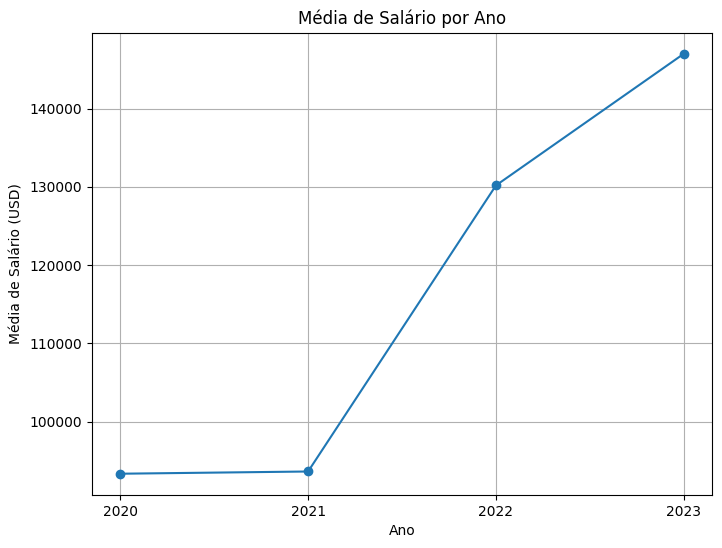

In [ ]:
# Plotagem do gráfico de linhas

media_por_ano = dados_sem_duplicatas.groupby('work_year')['salary_in_usd'].mean().reset_index()

# Lista com os anos presentes na base de dados
anos_presentes = media_por_ano['work_year'].tolist()

plt.figure(figsize=(8, 6))  # Define o tamanho da figura
plt.plot(media_por_ano['work_year'], media_por_ano['salary_in_usd'], marker='o', linestyle='-')  # Cria o gráfico de linhas
plt.title('Média de Salário por Ano')  # Adiciona o título do gráfico
plt.xlabel('Ano')  # Rótulo do eixo x
plt.ylabel('Média de Salário (USD)')  # Rótulo do eixo y
plt.grid(True)  # Adiciona uma grade ao gráfico (opcional)

# Define os valores a serem exibidos no eixo x como inteiros (apenas os anos presentes na base de dados)
plt.xticks([int(work_year) for work_year in anos_presentes])

# Mostra o gráfico
plt.show()

In [ ]:
# Contar a quantidade de cargos únicos
quantidade_cargos = dados_sem_duplicatas['job_title'].nunique()
print(quantidade_cargos)

93


In [ ]:
# Calcula a média do salário para cada job_title e ordena em ordem decrescente
media_por_job_title = dados_sem_duplicatas.groupby('job_title')['salary_in_usd'].mean().reset_index()
top_10_cargos_maiores_salarios = media_por_job_title.sort_values(by='salary_in_usd', ascending=False).head(30)

print("Os 10 cargos com os maiores salários:")
print(top_10_cargos_maiores_salarios)

Os 10 cargos com os maiores salários:
                                   job_title  salary_in_usd
46                    Data Science Tech Lead  375000.000000
19                      Cloud Data Architect  250000.000000
35                                 Data Lead  212500.000000
28                       Data Analytics Lead  211254.500000
84                  Principal Data Scientist  198171.125000
53                  Director of Data Science  195140.727273
83                   Principal Data Engineer  192500.000000
75        Machine Learning Software Engineer  192420.000000
8                          Applied Scientist  190342.580645
85       Principal Machine Learning Engineer  190000.000000
58                              Head of Data  183857.500000
45                      Data Science Manager  181930.173077
34              Data Infrastructure Engineer  175051.666667
18            Business Intelligence Engineer  174150.000000
31                            Data Architect  167751.453125
88

In [ ]:
# Calcula a média do salário para cada job_title e ordena em ordem crescente
media_por_job_title = dados_sem_duplicatas.groupby('job_title')['salary_in_usd'].mean().reset_index()
bottom_10_cargos_menores_salarios = media_por_job_title.sort_values(by='salary_in_usd', ascending=True).head(10)

print("Os 10 cargos com os menores salários:")
print(bottom_10_cargos_menores_salarios)

Os 10 cargos com os menores salários:
                             job_title  salary_in_usd
80                  Power BI Developer        5409.00
87              Product Data Scientist        8000.00
91                  Staff Data Analyst       15000.00
0        3D Computer Vision Researcher       21352.25
9        Autonomous Vehicle Technician       26277.50
22             Compliance Data Analyst       30000.00
82            Principal Data Architect       38154.00
72  Machine Learning Research Engineer       42819.25
61                     Insight Analyst       46786.00
32                Data DevOps Engineer       53654.00


In [ ]:
import seaborn as sns

# Contagem de ocorrências para cada company_location
contagem_por_location = dados_sem_duplicatas['company_location'].value_counts().reset_index()
contagem_por_location.columns = ['company_location', 'count']

display(contagem_por_location)


,company_location,count
0,US,1929
1,GB,155
2,CA,83
3,IN,57
4,DE,55
...,...,...
67,MK,1
68,BS,1
69,IR,1
70,CR,1


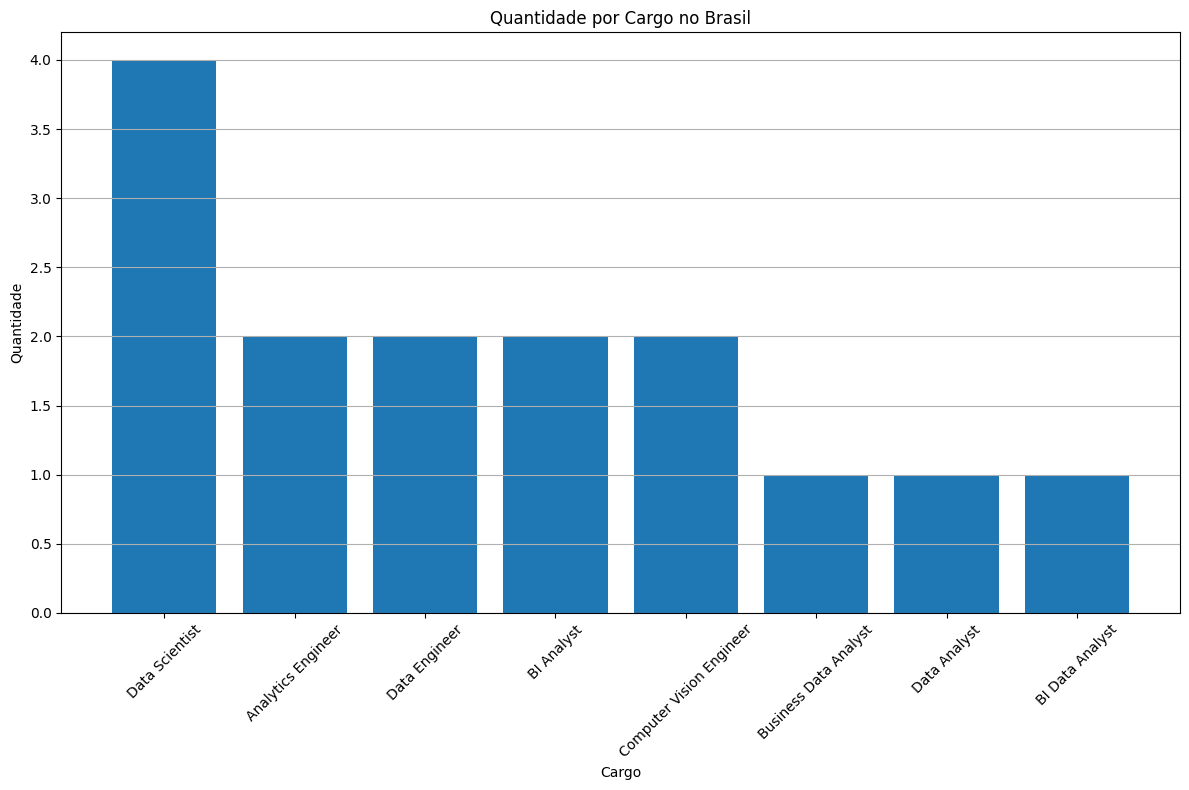

In [ ]:
# Filtrar dados apenas para o Brasil
dados_brasil = dados_sem_duplicatas[dados_sem_duplicatas['company_location'] == 'BR']

# Contagem de ocorrências para cada job_title no Brasil
contagem_por_cargo = dados_brasil['job_title'].value_counts().reset_index()
contagem_por_cargo.columns = ['job_title', 'count']

# Plotagem do gráfico de barras com a quantidade por cargo no Brasil
plt.figure(figsize=(12, 8))  # Define o tamanho da figura
plt.bar(contagem_por_cargo['job_title'], contagem_por_cargo['count'])  # Cria o gráfico de barras
plt.title('Quantidade por Cargo no Brasil')  # Adiciona o título do gráfico
plt.xlabel('Cargo')  # Rótulo do eixo x
plt.ylabel('Quantidade')  # Rótulo do eixo y
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor visualização
plt.grid(axis='y')  # Adiciona uma grade horizontal ao gráfico (opcional)

# Mostra o gráfico
plt.tight_layout()  # Ajusta o layout para evitar cortes
plt.show()


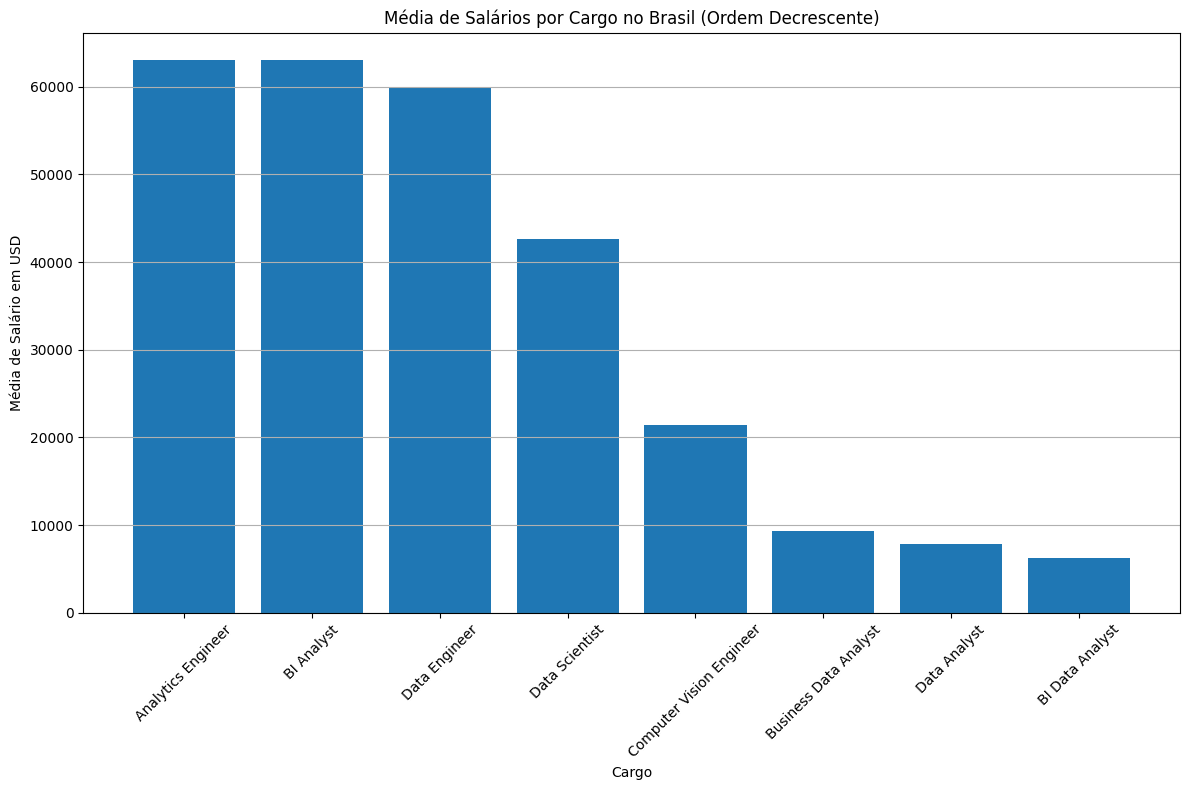

In [ ]:
# Filtrar dados apenas para o Brasil
dados_brasil = dados_sem_duplicatas[dados_sem_duplicatas['company_location'] == 'BR']

# Calcula a média do salário para cada job_title no Brasil
media_salarios_por_cargo = dados_brasil.groupby('job_title')['salary_in_usd'].mean().reset_index()

# Ordenar os dados em ordem decrescente pela média de salários
media_salarios_por_cargo = media_salarios_por_cargo.sort_values(by='salary_in_usd', ascending=False)

# Plotagem do gráfico de barras com os salários por cargo no Brasil (ordenado em ordem decrescente)
plt.figure(figsize=(12, 8))  # Define o tamanho da figura
plt.bar(media_salarios_por_cargo['job_title'], media_salarios_por_cargo['salary_in_usd'])  # Cria o gráfico de barras
plt.title('Média de Salários por Cargo no Brasil (Ordem Decrescente)')  # Adiciona o título do gráfico
plt.xlabel('Cargo')  # Rótulo do eixo x
plt.ylabel('Média de Salário em USD')  # Rótulo do eixo y
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor visualização
plt.grid(axis='y')  # Adiciona uma grade horizontal ao gráfico (opcional)

# Mostra o gráfico
plt.tight_layout()  # Ajusta o layout para evitar cortes
plt.show()

